Initial Data:
  Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0  SEN-1000  2025-01-01            36.22    6.98           21.3        50.4   
1  SEN-1001  2025-01-02            76.55    5.03           23.5        34.3   
2  SEN-1002  2025-01-03            61.24    6.52           21.9        54.6   
3  SEN-1003  2025-01-04            51.91    6.62           24.0        48.7   
4  SEN-1004  2025-01-05            20.92    5.98           19.2        70.6   

  Crop_Type Fertilizer_Recommended(kg/ha) Irrigation_Recommended(mm)  \
0  Tomatoes                          67.6                       26.6   
1     Wheat                         130.4                        8.3   
2  Tomatoes                          36.0                       29.4   
3     Maize                          85.8                       19.6   
4     Wheat                          75.6                       29.9   

  Drone_Image_ID  
0       IMG-2000  
1       IMG-2001  
2       IMG-2002  
3 

<Figure size 1500x1000 with 0 Axes>

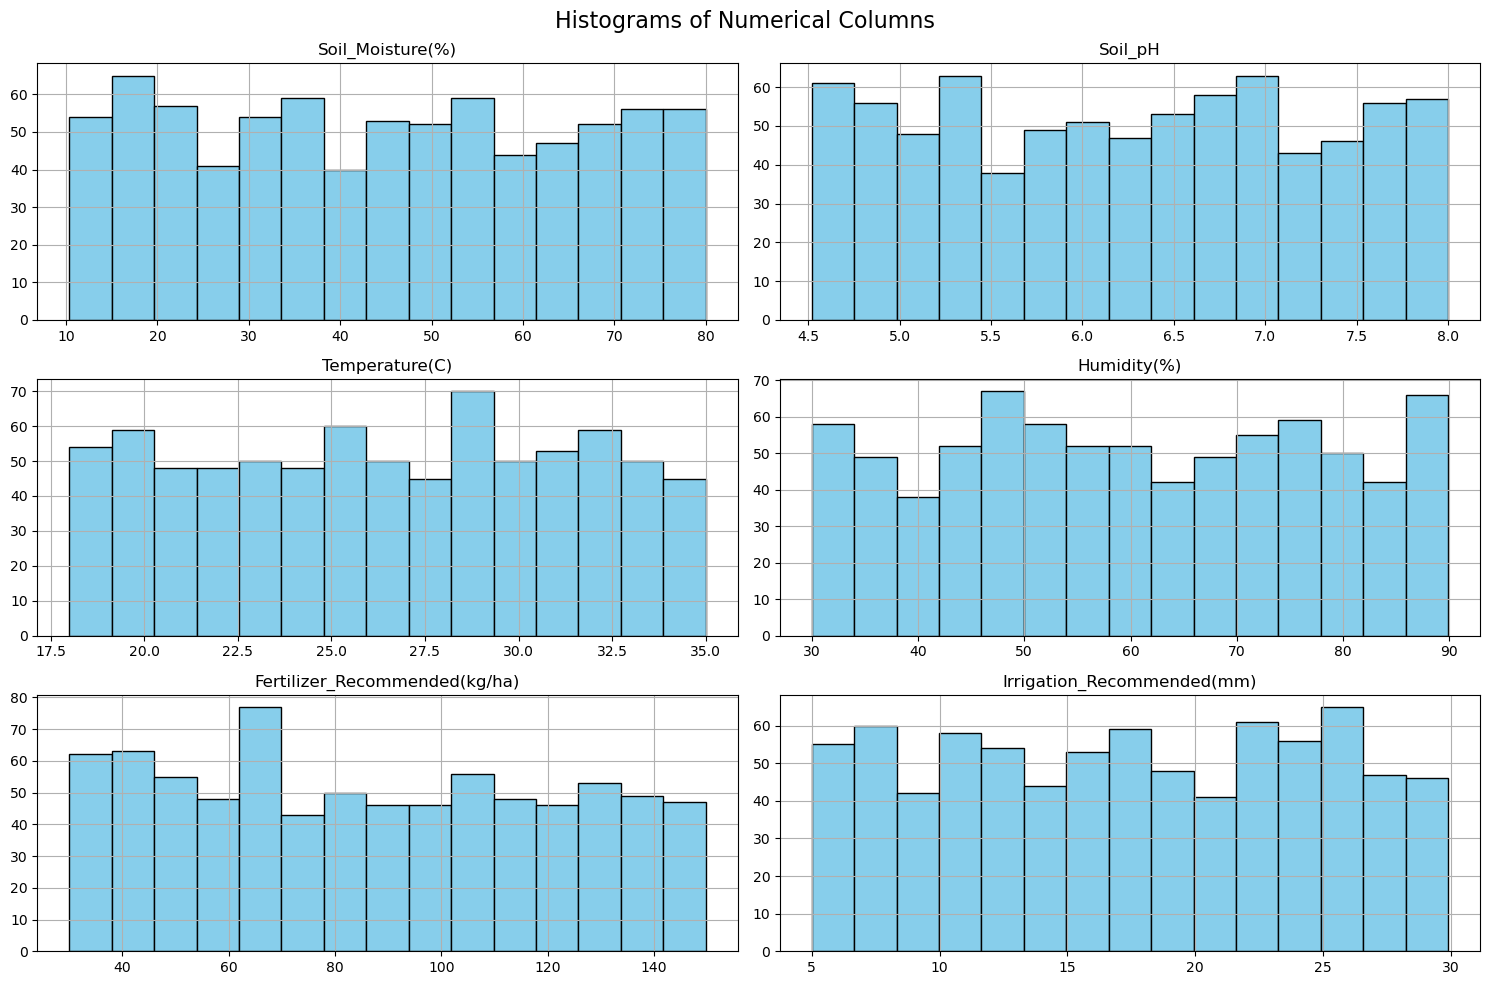

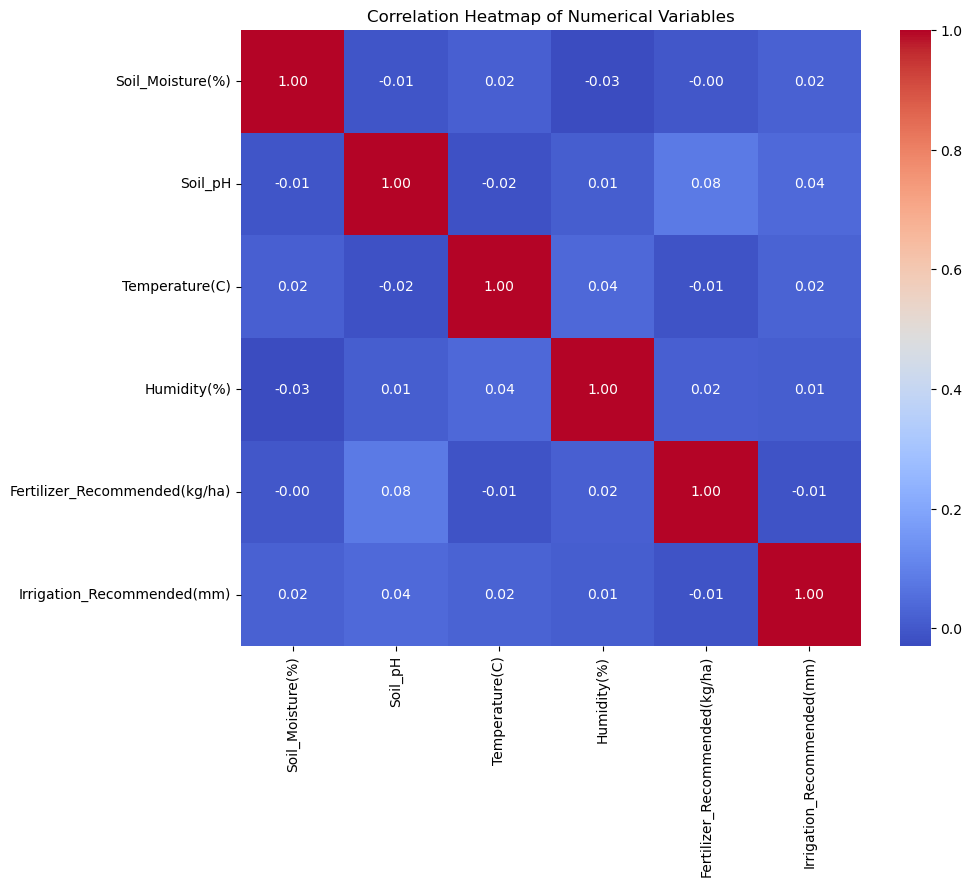


Correlation with Fertilizer Recommended:
Fertilizer_Recommended(kg/ha)    1.000000
Soil_pH                          0.082782
Humidity(%)                      0.015420
Soil_Moisture(%)                -0.002751
Temperature(C)                  -0.010626
Irrigation_Recommended(mm)      -0.010808
Name: Fertilizer_Recommended(kg/ha), dtype: float64

Average Soil Moisture by Crop Type:
Crop_Type
Wheat       47.195731
Maize       44.952078
Beans       44.332133
Tomatoes    44.179333
Lettuce     42.916980
Name: Soil_Moisture(%), dtype: float64

Average Irrigation for High-Temperature Crops (>30°C):
Crop_Type
Tomatoes    18.919565
Wheat       18.811429
Beans       17.857692
Maize       16.625455
Lettuce     16.297297
Name: Irrigation_Recommended(mm), dtype: float64

Cleaned data exported to 'cleaned_climate_action_data.csv'.

=== Summary of Recommendations ===
1️⃣ Adjust fertilizer usage based on Soil Moisture(%) and Soil pH as they show strong correlations.
2️⃣ The crop with the highest averag

In [2]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
df = pd.read_csv('climate_action_data.csv')  # Replace with your actual file name
print("Initial Data:")
print(df.head())
print("\nData Information:")
print(df.info())

# 2. Remove duplicate records
df = df.drop_duplicates()
print("\nDuplicate records removed.")

# 3. Replace erroneous values ('error') with NaN
df = df.replace('error', np.nan)
print("\nReplaced 'error' with NaN.")

# 4. Handling missing values
df = df.dropna()  # Alternatively, you could use df.fillna() if appropriate
print("\nMissing values dropped.")
print(f"Remaining records: {len(df)}")

# 5. Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# 6. Convert numerical columns to float
numerical_cols = [
    'Soil_Moisture(%)',
    'Soil_pH',
    'Temperature(C)',
    'Humidity(%)',
    'Fertilizer_Recommended(kg/ha)',
    'Irrigation_Recommended(mm)'
]
for col in numerical_cols:
    df[col] = df[col].astype(float)
print("\nConverted data types.")

# 7. Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

# 8. Histograms for numerical columns
plt.figure(figsize=(15, 10))
df[numerical_cols].hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Columns", fontsize=16)
plt.tight_layout()
plt.show()

# 9. Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

# 10. Analysis
# 10.1 Variables influencing Fertilizer_Recommended(kg/ha)
fertilizer_corr = corr['Fertilizer_Recommended(kg/ha)'].sort_values(ascending=False)
print("\nCorrelation with Fertilizer Recommended:")
print(fertilizer_corr)

# 10.2 Crop with highest average soil moisture
avg_soil_moisture = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False)
print("\nAverage Soil Moisture by Crop Type:")
print(avg_soil_moisture)

# 10.3 Irrigation adjustments for high temperatures (>30°C)
high_temp_df = df[df['Temperature(C)'] > 30]
avg_irrigation_high_temp = high_temp_df.groupby('Crop_Type')['Irrigation_Recommended(mm)'].mean().sort_values(ascending=False)
print("\nAverage Irrigation for High-Temperature Crops (>30°C):")
print(avg_irrigation_high_temp)

# 11. Export the cleaned dataset
df.to_csv('cleaned_climate_action_data.csv', index=False)
print("\nCleaned data exported to 'cleaned_climate_action_data.csv'.")

# 12. Summary of Recommendations
print("\n=== Summary of Recommendations ===")
print("1️⃣ Adjust fertilizer usage based on Soil Moisture(%) and Soil pH as they show strong correlations.")
print(f"2️⃣ The crop with the highest average soil moisture is: {avg_soil_moisture.index[0]}")
print("3️⃣ For crops experiencing high temperatures (>30°C), consider increasing irrigation according to the calculated averages above.")
print("✅ Analysis complete.")
